# 1. Paraprocesimi i të dhënave


## 1.1 Leximi i CSV-së

In [1]:
import pandas as pd
import numpy as np
from collections import Counter
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from warnings import simplefilter
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from PIL import Image
import random
import requests
import plotly.express as px #distribution according to countries
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
simplefilter(action='ignore', category=FutureWarning)

In [2]:
dataseti = pd.read_csv("netflix_titles.csv")

In [3]:
dataseti.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


## 1.2 Definimi i atributeve

In [4]:
attr_obj = dataseti.shape
print(f"Numri i atributeve në dataset është: {attr_obj[1]}")
print(f"Numri i objekteve në dataset është: {attr_obj[0]}")

Numri i atributeve në dataset është: 12
Numri i objekteve në dataset është: 8807


In [5]:
x = dataseti.columns.tolist()

print('Atributet në dataset:')

for item in x:
    print(f'    - {item}')

Atributet në dataset:
    - show_id
    - type
    - title
    - director
    - cast
    - country
    - date_added
    - release_year
    - rating
    - duration
    - listed_in
    - description


## 1.3 Tipet e të dhënave

In [6]:
dataseti.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

## 1.4 Kualiteti i të dhënave

### 1.4.1 Identifikimi i vlerave të zbrazëta

In [7]:
def num_missing(x):
  return sum(x.isnull())

In [8]:
print("Numri i vlerave që mungojnë në çdo kolonë:")
print(dataseti.apply(num_missing, axis=0)) #axis=0 nenkupton qe funksionoi num_missing do te aplikohet ne cdo kolone

Numri i vlerave që mungojnë në çdo kolonë:
show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64


### 1.4.2 Strategjia e trajtimit të vlerave të zbrazëta

In [9]:
#Largimi i rreshtave me vlera NaN
print('Numri i rreshtave në dataset-in origjinal = %d' % (dataseti.shape[0]))

dataseti = dataseti.dropna(axis=0, subset=['director'])
dataseti = dataseti.dropna(axis=0, subset=['cast'])
dataseti = dataseti.dropna(axis=0, subset=['country'])

print('Numri i rreshtave pas largimit të rreshtave me vlera NaN = %d' % (dataseti.shape[0]))
print("Dataseti pas largimit të vlerave të zbrazëta:")

dataseti.head()

Numri i rreshtave në dataset-in origjinal = 8807
Numri i rreshtave pas largimit të rreshtave me vlera NaN = 5336
Dataseti pas largimit të vlerave të zbrazëta:


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...
24,s25,Movie,Jeans,S. Shankar,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...",India,"September 21, 2021",1998,TV-14,166 min,"Comedies, International Movies, Romantic Movies",When the father of the man she loves insists t...


In [10]:
print("Numri i vlerave që mungojnë në çdo kolonë pas ndryshimeve:")
print(dataseti.apply(num_missing, axis=0))

Numri i vlerave që mungojnë në çdo kolonë pas ndryshimeve:
show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          1
duration        3
listed_in       0
description     0
dtype: int64


In [11]:
def nullToModeValue(kolona, tipi):
    duration_column = dataseti[kolona]
    type_column =dataseti[tipi]
    duration_counter = Counter(duration_column)
    type_counter = Counter(type_column)
    
    duration_column_object = dict(duration_column)
    type_column_object = dict(type_column)
    
    for item in duration_column_object:
        for element in type_column_object:
            if item == element:
                if f'{duration_column_object[item]}' == 'nan':
                    print('Type:', type_column_object[element], f', {kolona}:', duration_column_object[item])
    
    print(f'\nNumri i vlerave null në kolonën {kolona} : {dataseti[kolona].isnull().sum()}')
    
    print("Vlera më së shumti e përsëritur:", duration_counter.most_common(1)[0][0])
    dataseti[kolona].fillna(duration_counter.most_common(1)[0][0], inplace=True)
    print(f'\nNumri i vlerave null pas plotësimit të vlerave NaN në kolonën {kolona} : {dataseti[kolona].isnull().sum()}')

In [12]:
nullToModeValue("duration", "type")

Type: Movie , duration: nan
Type: Movie , duration: nan
Type: Movie , duration: nan

Numri i vlerave null në kolonën duration : 3
Vlera më së shumti e përsëritur: 94 min

Numri i vlerave null pas plotësimit të vlerave NaN në kolonën duration : 0


In [13]:
nullToModeValue("rating", "type")

Type: Movie , rating: nan

Numri i vlerave null në kolonën rating : 1
Vlera më së shumti e përsëritur: TV-MA

Numri i vlerave null pas plotësimit të vlerave NaN në kolonën rating : 0


In [14]:
print("Numri i vlerave që mungojnë në cdo kolonë pas ndryshimeve finale:")
print(dataseti.apply(num_missing, axis=0))

Numri i vlerave që mungojnë në cdo kolonë pas ndryshimeve finale:
show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64


In [15]:
print('Gjatësia finale e dataset-it pas trajtimeve më sipër:', len(dataseti['release_year']))

Gjatësia finale e dataset-it pas trajtimeve më sipër: 5336


### 1.4.3 Pastrimi i vlerave të përsëritura

In [16]:
dups = dataseti.duplicated()
print('Numri i rreshtave të përsëritur = %d' % (dups.sum()))

Numri i rreshtave të përsëritur = 0


In [17]:
#Largimi i rreshtave te perseritur

#print('Numri i rreshtave para largimit te duplikateve = %d' % (dataseti.shape[0]))
#dataseti = dataseti.drop_duplicates()
#print('Numri i rreshtave pas largimit te duplikateve = %d' % (dataseti.shape[0]))

## 1.5 Pastrimi i vlerave jo valide

In [18]:
print(f"\nGrupimi i elementeve sipas atributit 'type':")
dataseti.groupby(['type'])['type'].count()


Grupimi i elementeve sipas atributit 'type':


type
Movie      5189
TV Show     147
Name: type, dtype: int64

Nga komanda e mësipërme vërejmë që për atributin 'type' nuk kemi vlera jo valide.

In [19]:
print(f"\nGrupimi i elementeve sipas atributit 'release_year':")
dataseti.groupby(['release_year'])['release_year'].count()


Grupimi i elementeve sipas atributit 'release_year':


release_year
1942      1
1944      1
1945      1
1946      1
1947      1
       ... 
2017    658
2018    648
2019    519
2020    442
2021    161
Name: release_year, Length: 72, dtype: int64

Nga komanda e mësipërme vërejmë që për atributin 'release_year' nuk kemi vlera jo valide.

In [20]:
print(f"\nGrupimi i elementeve sipas atributit 'rating':")
dataseti.groupby(['rating'])['rating'].count()


Grupimi i elementeve sipas atributit 'rating':


rating
66 min         1
74 min         1
84 min         1
G             40
NC-17          2
NR            58
PG           275
PG-13        470
R            778
TV-14       1214
TV-G          84
TV-MA       1823
TV-PG        431
TV-Y          76
TV-Y7         76
TV-Y7-FV       3
UR             3
Name: rating, dtype: int64

Nga komanda e mësipërme vërejmë që për atributin 'rating' kemi 3 vlera jo valide, të cilat do t'i trajtojmë në vijim.

In [21]:
#update fields to NaN
dataseti.loc[(dataseti.rating == '66 min') | (dataseti.rating == '74 min') | (dataseti.rating == '84 min'), 'rating'] = 'nan'

In [22]:
print(f"\nGrupimi i elementeve sipas atributit 'rating' pas UPDATE:")
dataseti.groupby(['rating'])['rating'].count()


Grupimi i elementeve sipas atributit 'rating' pas UPDATE:


rating
G             40
NC-17          2
NR            58
PG           275
PG-13        470
R            778
TV-14       1214
TV-G          84
TV-MA       1823
TV-PG        431
TV-Y          76
TV-Y7         76
TV-Y7-FV       3
UR             3
nan            3
Name: rating, dtype: int64

In [23]:
#ku kemi stringun nan konvertoje ne nan type
dataseti.loc[dataseti.rating == 'nan', 'rating'] = np.nan

In [24]:
dataseti["rating"].value_counts(dropna=False)

TV-MA       1823
TV-14       1214
R            778
PG-13        470
TV-PG        431
PG           275
TV-G          84
TV-Y7         76
TV-Y          76
NR            58
G             40
NaN            3
TV-Y7-FV       3
UR             3
NC-17          2
Name: rating, dtype: int64

In [25]:
dataseti["rating"].value_counts()

TV-MA       1823
TV-14       1214
R            778
PG-13        470
TV-PG        431
PG           275
TV-G          84
TV-Y7         76
TV-Y          76
NR            58
G             40
TV-Y7-FV       3
UR             3
NC-17          2
Name: rating, dtype: int64

Atributi rating u pastruara nga vlerat jo valide.

In [26]:
print(f"\nGrupimi i elementeve sipas atributit 'duration':")
dataseti.groupby(['duration'])['duration'].count()


Grupimi i elementeve sipas atributit 'duration':


duration
1 Season    106
100 min      90
101 min     104
102 min     112
103 min     101
           ... 
95 min      127
96 min      109
97 min      129
98 min      109
99 min      106
Name: duration, Length: 198, dtype: int64

In [27]:
print(f"\nGrupimi i elementeve sipas atributit 'duration':")
dict(dataseti.groupby(['duration'])['duration'].count())


Grupimi i elementeve sipas atributit 'duration':


{'1 Season': 106,
 '100 min': 90,
 '101 min': 104,
 '102 min': 112,
 '103 min': 101,
 '104 min': 99,
 '105 min': 90,
 '106 min': 99,
 '107 min': 86,
 '108 min': 77,
 '109 min': 66,
 '110 min': 85,
 '111 min': 61,
 '112 min': 72,
 '113 min': 62,
 '114 min': 49,
 '115 min': 57,
 '116 min': 76,
 '117 min': 59,
 '118 min': 62,
 '119 min': 61,
 '12 min': 2,
 '120 min': 51,
 '121 min': 52,
 '122 min': 39,
 '123 min': 41,
 '124 min': 51,
 '125 min': 34,
 '126 min': 42,
 '127 min': 47,
 '128 min': 41,
 '129 min': 32,
 '13 min': 1,
 '130 min': 40,
 '131 min': 31,
 '132 min': 36,
 '133 min': 39,
 '134 min': 22,
 '135 min': 35,
 '136 min': 21,
 '137 min': 36,
 '138 min': 14,
 '139 min': 20,
 '14 min': 1,
 '140 min': 23,
 '141 min': 17,
 '142 min': 13,
 '143 min': 23,
 '144 min': 8,
 '145 min': 16,
 '146 min': 11,
 '147 min': 11,
 '148 min': 19,
 '149 min': 15,
 '15 Seasons': 1,
 '15 min': 2,
 '150 min': 16,
 '151 min': 15,
 '152 min': 5,
 '153 min': 11,
 '154 min': 12,
 '155 min': 10,
 '156 min':

Nga komanda e mësipërme vërejmë që për atributin 'duration' nuk kemi vlera jo valide.

## 1.6 Agregimi

### 1.6.1 Agregimi përmes atributit "rating"

In [28]:
rating_agg = dataseti.groupby(['rating'])

In [29]:
rating_agg.describe()

release_year                                                   \
                count         mean        std     min      25%     50%   
rating                                                                   
G                40.0  1997.250000  18.327155  1956.0  1988.25  2002.5   
NC-17             2.0  2013.500000   0.707107  2013.0  2013.25  2013.5   
NR               58.0  2009.948276  11.840197  1958.0  2011.25  2015.0   
PG              275.0  2008.127273  11.753326  1973.0  2004.00  2011.0   
PG-13           470.0  2009.178723   8.945343  1955.0  2005.00  2011.0   
R               778.0  2010.341902  10.003413  1962.0  2007.00  2014.0   
TV-14          1214.0  2012.218287  10.630927  1942.0  2011.00  2016.0   
TV-G             84.0  2015.297619   9.063072  1954.0  2015.00  2017.0   
TV-MA          1823.0  2015.908941   6.026692  1963.0  2016.00  2017.0   
TV-PG           431.0  2012.106729  11.644251  1946.0  2011.00  2016.0   
TV-Y             76.0  2016.881579   3.773476  2003.0  2015.00  2018.0   
TV-Y7            76.0  2015.881579   3.622033  2006.0  2013.00  2016.0   
TV-Y7-FV          3.0  2013.666667   2.081666  2012.0  2012.50  2013.0   
UR                3.0  1999.333333  22.300972  1974.0  1991.00  2008.0   

                           
              75%     max  
rating                     
G         2009.50  2019.0  
NC-17     2013.75  2014.0  
NR        2016.00  2018.0  
PG        2017.00  2021.0  
PG-13     2016.00  2021.0  
R         2017.00  2021.0  
TV-14     2018.00  2021.0  
TV-G      2019.25  2021.0  
TV-MA     2019.00  2021.0  
TV-PG     2018.00  2021.0  
TV-Y      2020.00  2021.0  
TV-Y7     2019.00  2021.0  
TV-Y7-FV  2014.50  2016.0  
UR        2012.00  2016.0

In [30]:
rating_agg.agg('min')

,show_id,type,title,director,cast,country,date_added,release_year,duration,listed_in,description
rating,,,,,,,,,,,
G,s108,Movie,A Champion Heart,Ben Wallis,"Anika Noni Rose, Bruno Campos, Keith David, Mi...",Canada,"April 1, 2018",1956,100 min,"Action & Adventure, Classic Movies, Sci-Fi & F...",A pilot challenges Balto's son Kodi and his sl...
NC-17,s5265,Movie,Blue Is the Warmest Color,Abdellatif Kechiche,"Léa Seydoux, Adèle Exarchopoulos, Salim Kechio...",Canada,"August 26, 2016",2013,112 min,"Comedies, International Movies","After losing a TV network deal, the Trailer Pa..."
NR,s5988,Movie,13 Cameras,"Aaron Nee, Adam Nee","Addison Timlin, Ally Sheedy, Keith Poulson, Pe...",Argentina,"April 1, 2016",1958,101 min,"Action & Adventure, Comedies, Independent Movies","""Last Comic Standing"" winner Iliza Shlesinger ..."
PG,s1020,Movie,A 2nd Chance,Aamir Khan,"Aamir Khan, Darsheel Safary, Tanay Chheda, Tis...","Argentina, Spain","April 1, 2018",1973,100 min,"Action & Adventure, Anime Features, Children &...",A 10-year-old dreamer's imaginary friends – mi...
PG-13,s10,Movie,"10,000 B.C.",Adam McKay,"Aamir Khan, Kareena Kapoor, Madhavan, Sharman ...",Australia,"April 1, 2016",1955,100 min,Action & Adventure,A 9-year-old boy finds his life upended when h...
R,s1014,Movie,13 Sins,Aaron Sorkin,"50 Cent, Ryan Phillippe, Bruce Willis, Rory Ma...",Argentina,"April 1, 2018",1962,100 min,Action & Adventure,"""Friends with benefits"" Emma and Adam are fine..."
TV-14,s1002,Movie,#AnneFrank - Parallel Stories,A. L. Vijay,"Aadhi, Tapsee Pannu, Ritika Singh, Vennela Kis...",", France, Algeria","March 31, 2018",1942,1 Season,Action & Adventure,"""Queen of Sleaze"" or feminist pioneer? Powerho..."
TV-G,s1190,Movie,#FriendButMarried,Alastair Fothergill,"Adipati Dolken, Mawar de Jongh, Sari Nila, Von...",Australia,"April 1, 2020",1954,1 Season,"British TV Shows, Docuseries, International TV...",A by-the-book political aide falls for a big-h...
TV-MA,s1000,Movie,#Alive,Aadish Keluskar,"Aamina Sheikh, Sanam Saeed, Adnan Malik, Moham...",Argentina,"April 1, 2017",1963,1 Season,Action & Adventure,"""Brooklyn Nine-Nine"" star Chelsea Peretti show..."


In [31]:
rating_agg.agg('max')

,show_id,type,title,director,cast,country,date_added,release_year,duration,listed_in,description
rating,,,,,,,,,,,
G,s934,Movie,Willy Wonka & the Chocolate Factory,"Vincente Minnelli, Charles Walters","Zach Braff, Joan Cusack, Patrick Stewart, Stev...","United States, Spain","September 4, 2021",2019,99 min,"Documentaries, Music & Musicals",Zany Willy Wonka causes a stir when he announc...
NC-17,s6339,Movie,Swearnet: The Movie,Warren P. Sonoda,"Mike Smith, John Paul Tremblay, Robb Wells, Pa...","France, Belgium, Spain","September 24, 2017",2014,180 min,"Dramas, Independent Movies, International Movies","Determined to fall in love, 15-year-old Adele ..."
NR,s8793,Movie,Young Tiger,Zatella Beatty,Zachary Levi,"United States, India, Bangladesh","September 29, 2018",2018,96 min,Stand-Up Comedy,Young parents-to-be Claire and Ryan move into ...
PG,s95,Movie,Zoom,Zack Snyder,"YaYa Gosselin, Pedro Pascal, Priyanka Chopra, ...","United States, United Kingdom, Canada","September 8, 2021",2021,99 min,"Dramas, Sports Movies",Zany misadventures are in store as lovable cit...
PG-13,s971,Movie,Æon Flux,"Àlex Pastor, David Pastor","Zoey Deutch, Lucy Fry, Danila Kozlovsky, Gabri...","United States, United Kingdom, Spain, South Korea","September 9, 2020",2021,99 min,Thrillers,Young Americans visit Moscow when the city is ...
R,s972,Movie,Zoot Suit,Zoe Lister-Jones,"Zoe Lister-Jones, Adam Pally, Fred Armisen, Su...","United States, United Kingdom, Italy","September 8, 2020",2021,99 min,Thrillers,Zack and Miri make and star in an adult film t...
TV-14,s995,TV Show,​​Kuch Bheege Alfaaz,Şenol Sönmez,"Ṣọpẹ́ Dìrísù, Wunmi Mosaku, Matt Smith, Malaik...",Vietnam,"September 9, 2020",2021,99 min,Thrillers,"Zixin is about to marry Qihong, but her galliv..."
TV-G,s992,TV Show,You Can Tutu,Yandy Laurens,Woody Harrelson,Zimbabwe,"September 22, 2020",2021,97 min,Stand-Up Comedy,Young orphan Nicolas learns how to guide a sle...
TV-MA,s997,TV Show,반드시 잡는다,Ömer Faruk Sorak,"Şahin Irmak, İrem Sak, Gonca Vuslateri, Emre K...",Vietnam,"September 9, 2021",2021,99 min,Thrillers,Yılmaz Erdoğan's lauded stage play traces the ...


### 1.6.2 Agregimi përmes atributit "type"

In [33]:
type_agg = dataseti.groupby(['type'])

In [34]:
type_agg.describe()

release_year                                                         \
               count         mean       std     min     25%     50%     75%   
type                                                                          
Movie         5189.0  2012.614569  9.703360  1942.0  2011.0  2016.0  2018.0   
TV Show        147.0  2017.285714  4.047661  1990.0  2016.0  2018.0  2020.0   

                 
            max  
type             
Movie    2021.0  
TV Show  2021.0

In [35]:
type_agg.agg({'release_year': 'max'})

,release_year
type,
Movie,2021
TV Show,2021


In [36]:
type_agg.agg({'release_year': 'min'})

,release_year
type,
Movie,1942
TV Show,1990


## 1.7 Mostrimi

In [37]:
dataseti.sample(n=2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
2654,s2655,Movie,The Set Up,Niyi Akinmolayan,"Adesua Etomi, Jim Iyke, Dakore Akande, Marie H...",Nigeria,"April 22, 2020",2019,TV-MA,105 min,"Dramas, International Movies",Manipulation and personal vendettas collide wh...
7495,s7496,Movie,"Monster High: Frights, Camera, Action!",William Lau,"Sue Swan, Kate Higgins, Celeste Henderson, Mar...",United States,"January 1, 2018",2014,TV-Y7,74 min,Children & Family Movies,Draculaura is whisked to Transylvania to be cr...


In [38]:
dataseti.sample(frac=0.001)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
3057,s3058,Movie,Garfield Gets Real,"Mark A.Z. Dippé, Kyung Ho Lee","Frank Welker, Wally Wingert, Gregg Berger, Jen...",United States,"January 1, 2020",2007,TV-Y,78 min,"Children & Family Movies, Comedies","After trying to live in the ""real world"" and c..."
4161,s4162,Movie,Surga Yang Tak Dirindukan 2,"Hanung Bramantyo, Meisa Felaroze","Fedi Nuril, Raline Shah, Laudya Cynthia Bella,...",Indonesia,"January 28, 2019",2017,TV-14,119 min,"Dramas, Faith & Spirituality, International Mo...","In this sequel to the award-winning 2015 film,..."
6762,s6763,Movie,Fishtail,Andrew Renzi,Harry Dean Stanton,United States,"October 1, 2018",2015,NR,61 min,Documentaries,Harry Dean Stanton narrates this documentary t...
2637,s2638,Movie,The Promise,Mohamed Yassin,"Asser Yassin, Ruby, Ghassan Massoud, Bassem Sa...",Egypt,"April 25, 2020",2008,TV-14,110 min,"Dramas, International Movies",When his powerful crime czar boss kills the ma...
7025,s7026,Movie,Hungerford,Drew Casson,"Drew Casson, Georgia Bradley, Sam Carter, Tom ...",United Kingdom,"June 23, 2018",2014,TV-MA,79 min,"Horror Movies, Independent Movies, Internation...",While filming his daily life for a media cours...


In [39]:
dataseti.sample(n=2, axis=1)

,description,type
7,"On a photo shoot in Ghana, an American model s...",Movie
8,A talented batch of amateur bakers face off in...,TV Show
9,A woman adjusting to life after a loss contend...,Movie
12,After most of her family is murdered in a terr...,Movie
24,When the father of the man she loves insists t...,Movie
...,...,...
8801,Recovering alcoholic Talal wakes up inside a s...,Movie
8802,"A political cartoonist, a crime reporter and a...",Movie
8804,Looking to survive in a world taken over by zo...,Movie
8805,"Dragged from civilian life, a former superhero...",Movie


In [40]:
dataseti['rating'].sample(n=3)

6929    TV-14
3952    TV-MA
3152    TV-MA
Name: rating, dtype: object

In [41]:
dataseti['rating'].sample(n=3, random_state=1)

3022    TV-14
4438    TV-MA
8662    TV-14
Name: rating, dtype: object

In [42]:
dataseti.sample(3, axis=1).head()

,director,rating,cast
7,Haile Gerima,TV-MA,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D..."
8,Andy Devonshire,TV-14,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho..."
9,Theodore Melfi,PG-13,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T..."
12,Christian Schwochow,TV-MA,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ..."
24,S. Shankar,TV-14,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi..."


In [43]:
col = 'type'
for typ in list(dataseti[col].dropna().unique()):
    print(typ, end=' - ')
    display(dataseti[dataseti[col] == typ].sample(3))

Movie - 

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
58,s59,Movie,Naruto Shippûden the Movie: The Will of Fire,Masahiko Murata,"Junko Takeuchi, Chie Nakamura, Kazuhiko Inoue,...",Japan,"September 15, 2021",2009,TV-PG,96 min,"Action & Adventure, Anime Features, Internatio...",When four out of five ninja villages are destr...
8270,s8271,Movie,The Dawn Wall,"Peter Mortimer, Josh Lowell","Tommy Caldwell, Kevin Jorgeson","Austria, United States","March 4, 2019",2017,TV-MA,100 min,"Documentaries, Sports Movies",Cameras follow Tommy Caldwell and Kevin Jorges...
2547,s2548,Movie,Have a Good Trip: Adventures in Psychedelics,Donick Cary,"Nick Offerman, Adam Scott",United States,"May 11, 2020",2020,TV-MA,86 min,Documentaries,Explore hallucinogenic highs and lows as celeb...


TV Show - 

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
6742,s6743,TV Show,Father Brown,Ian Barber,"Mark Williams, Sorcha Cusack, Nancy Carroll, A...",United Kingdom,"March 31, 2018",2017,TV-14,6 Seasons,"British TV Shows, Crime TV Shows, TV Dramas","A modest, compassionate priest doubles as an e..."
2846,s2847,TV Show,Velvet,Carlos Sedes,"Paula Echevarría, Miguel Ángel Silvestre, Aita...",Spain,"March 4, 2020",2016,TV-14,4 Seasons,"International TV Shows, Romantic TV Shows, Spa...","In 1950s Spain, the heir to a fashion house ro..."
7140,s7141,TV Show,Jonathan Strange & Mr Norrell,Toby Haynes,"Eddie Marsan, Bertie Carvel, Marc Warren, Char...",United Kingdom,"August 25, 2016",2015,TV-14,1 Season,"British TV Shows, TV Dramas, TV Sci-Fi & Fantasy","In 1806, ambitious magician Norrell leads a re..."


In [44]:
col = 'type'
sample = []

variants = list(dataseti[col].dropna().unique())
print(variants)

for typ in variants:
    sample.append(dataseti[dataseti[col] == typ].sample())
pd.concat(sample)


['Movie', 'TV Show']


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7579,s7580,Movie,New York Minute,Dennie Gordon,"Mary-Kate Olsen, Ashley Olsen, Eugene Levy, An...",United States,"January 1, 2020",2004,PG,91 min,"Children & Family Movies, Comedies",When bickering teenage twins accidentally land...
5144,s5145,TV Show,Oggy and the Cockroaches,Olivier Jean-Marie,"Don Michael Paul, Tony Sampson, Sam Vincent, M...",France,"December 1, 2017",2017,TV-Y7,1 Season,"Kids' TV, TV Comedies",Wimpy blue cat Oggy would like nothing more th...


In [45]:
dataseti.groupby('type').apply(lambda x: x.sample(n=3))

show_id     type                                          title  \
type                                                                           
Movie   6036   s6037    Movie  A Glimpse Inside the Mind of Charles Swan III   
        6530   s6531    Movie                                       Contract   
        3922   s3923    Movie                            Dabbe 5: Zehr-i Cin   
TV Show 6838   s6839  TV Show                               Geronimo Stilton   
        8302   s8303  TV Show                                       The Five   
        7140   s7141  TV Show                  Jonathan Strange & Mr Norrell   

                     director  \
type                            
Movie   6036    Roman Coppola   
        6530  Ram Gopal Varma   
        3922  Hasan Karacadağ   
TV Show 6838   Guy Vasilovich   
        8302    Mark Tonderai   
        7140      Toby Haynes   

                                                           cast  \
type                                                              
Movie   6036  Charlie Sheen, Jason Schwartzman, Bill Murray,...   
        6530  Adhvik Mahajan, Prasad Purandhare, Sakshi Gula...   
        3922  Nil Günal, Ümit Bülent Dinçer, Sultan Köroğlu ...   
TV Show 6838  Brian Drummond, Erin Mathews, Richard Ian Cox,...   
        8302  Tom Cullen, O.T. Fagbenle, Lee Ingleby, Sarah ...   
        7140  Eddie Marsan, Bertie Carvel, Marc Warren, Char...   

                            country          date_added  release_year rating  \
type                                                                           
Movie   6036          United States       July 15, 2018          2012      R   
        6530                  India       March 2, 2019          2008  TV-14   
        3922                 Turkey      April 12, 2019          2014  TV-MA   
TV Show 6838  Italy, Canada, France   December 31, 2017          2011   TV-Y   
        8302         United Kingdom  September 15, 2017          2016  TV-MA   
        7140         United Kingdom     August 25, 2016          2015  TV-14   

              duration                                         listed_in  \
type                                                                       
Movie   6036    86 min                      Comedies, Independent Movies   
        6530   116 min    Action & Adventure, Dramas, Independent Movies   
        3922   133 min               Horror Movies, International Movies   
TV Show 6838  1 Season                             Kids' TV, TV Comedies   
        8302  1 Season       British TV Shows, Crime TV Shows, TV Dramas   
        7140  1 Season  British TV Shows, TV Dramas, TV Sci-Fi & Fantasy   

                                                    description  
type                                                             
Movie   6036  When his girlfriend walks out and leaves him a...  
        6530  Following the death of his wife and daughter i...  
        3922  When Dilek becomes haunted by evil spirits and...  
TV Show 6838  With the help of brainy and adventurous sideki...  
        8302  Twenty years after 5-year-old Jesse disappears...  
        7140  In 1806, ambitious magician Norrell leads a re...

In [46]:
# kombinon dy rreshtat e pare dhe dy te fundit
rows = 2
dataseti.head(rows).append(dataseti.tail(rows))

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...


## 1.8 Diskretizimi dhe Binarizimi

### 1.8.1 Diskretizimi

In [47]:
release_decade = ['1941-1950', '1951-1960', '1961-1970', '1971-1980', '1981-1990', '1991-2000', '2001-2010', '2011-2020', '2021-2030']
s1 = pd.cut(x=dataseti.release_year, bins=9, labels=release_decade)

In [48]:
s1

7       1991-2000
8       2021-2030
9       2021-2030
12      2021-2030
24      2001-2010
          ...    
8801    2021-2030
8802    2011-2020
8804    2011-2020
8805    2011-2020
8806    2021-2030
Name: release_year, Length: 5336, dtype: category
Categories (9, object): ['1941-1950' < '1951-1960' < '1961-1970' < '1971-1980' ... '1991-2000' < '2001-2010' < '2011-2020' < '2021-2030']

### 1.8.2 Binarizimi

In [49]:
rating_binarization = pd.get_dummies(dataseti['rating'])
rating_binarization

,G,NC-17,NR,PG,PG-13,R,TV-14,TV-G,TV-MA,TV-PG,TV-Y,TV-Y7,TV-Y7-FV,UR
7,0,0,0,0,0,0,0,0,1,0,0,0,0,0
8,0,0,0,0,0,0,1,0,0,0,0,0,0,0
9,0,0,0,0,1,0,0,0,0,0,0,0,0,0
12,0,0,0,0,0,0,0,0,1,0,0,0,0,0
24,0,0,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8801,0,0,0,0,0,0,0,0,1,0,0,0,0,0
8802,0,0,0,0,0,1,0,0,0,0,0,0,0,0
8804,0,0,0,0,0,1,0,0,0,0,0,0,0,0
8805,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [50]:
release_year_binarization = pd.get_dummies(dataseti['release_year'])
release_year_binarization

,1942,1944,1945,1946,1947,1954,1955,1956,1958,1959,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
12,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
24,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8801,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
8802,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8804,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8805,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [51]:
type_binarization = pd.get_dummies(dataseti['type'])
type_binarization

,Movie,TV Show
7,1,0
8,0,1
9,1,0
12,1,0
24,1,0
...,...,...
8801,1,0
8802,1,0
8804,1,0
8805,1,0


## 1.9 Transformimi

In [52]:
rslt_df = dataseti.loc[dataseti['type'] == 'Movie']
rslt_df.groupby('release_year')['release_year'].transform(len)

7        23
9       146
12      146
24       30
27      140
       ... 
8801    342
8802     71
8804    112
8805     80
8806    342
Name: release_year, Length: 5189, dtype: int64

In [53]:
def retreive_mins(value):
    minutes = value.split(' ')[0]
    oret = int(minutes) // 60
    minutat = int(minutes) % 60
    
    if oret == 0:
        ora = f'{minutes} minutes'
    elif oret == 1:
        ora = f'{oret} hour and {minutat} minutes'
    else:
        ora = f'{oret} hours and {minutat} minutes'
    return str(ora)

In [54]:
retreive_mins('101 minutes')

'1 hour and 41 minutes'

In [55]:
rslt_df.groupby('duration')['duration'].transform(lambda x : retreive_mins(str(x)))[400:500]

931                 44 minutes
932                 46 minutes
933                 57 minutes
934     2 hours and 31 minutes
935                 38 minutes
                 ...          
1107    2 hours and 19 minutes
1108                44 minutes
1109                43 minutes
1110    2 hours and 15 minutes
1111                43 minutes
Name: duration, Length: 100, dtype: object

## 1.10 Reduktimi i Dimensionit

Reduktimi i dimensionit SVD (Singular Value Decomposition)

In [56]:
ds1 = pd.DataFrame(dataseti['release_year'])

In [57]:
u, s, vh = np.linalg.svd(ds1, full_matrices=False)

In [58]:
pd.DataFrame((u * s) @ vh, columns=ds1.columns).round(2)

,release_year
0,1993.0
1,2021.0
2,2021.0
3,2021.0
4,1998.0
...,...
5331,2015.0
5332,2007.0
5333,2009.0
5334,2006.0


Reduktimi i dimensionit duke përdorur PCA ose SVD është i papërshtatshëm për datasetin tonë për shkak të variancës së vogël të atributeve dhe pasi që kemi vetëm atributin 'release_year' me vlerë numerike (int).

## 1.11 Krijimi i vetive

In [59]:
dataseti.insert(12, 'year_added', int())
dataseti.insert(13, 'month_added', int())

In [60]:
months = {"January":1,
          "February":2,
          "March":3,
          "April":4,
          "May":5,
          "June":6,
          "July":7,
          "August":8,
          "September":9,
          "October":10,
          "November":11,
          "December":12}

for k, row in dataseti.iterrows():
    year = row['date_added'].split()[2]
    month = months[row['date_added'].split()[0]]
    dataseti.loc[k, "year_added"] = year
    dataseti.loc[k, "month_added"] = month 

print('Krijimi i vetive u përfundua me sukses!')

Krijimi i vetive u përfundua me sukses!


In [61]:
dataseti_by_year = dataseti[["type","year_added"]]
dataseti_by_year.groupby(["type","year_added"])['year_added'].count()

type     year_added
Movie    2008             1
         2009             2
         2010             1
         2011            13
         2012             3
         2013             6
         2014            14
         2015            47
         2016           197
         2017           704
         2018          1085
         2019          1236
         2020          1151
         2021           729
TV Show  2013             1
         2015             3
         2016             7
         2017            22
         2018            16
         2019            29
         2020            43
         2021            26
Name: year_added, dtype: int64

# 1.11 Zgjedhja e nënbashkësisë së vetive

Zgjedhja e nënbashkësive përmes Chi-Squared statistical test duke përdorur SelectKBest klasën.

In [62]:
arrayy = dataseti.values
X = arrayy[:,12:14]
Y = arrayy[:,12]

In [63]:
Y

array(['2021', '2021', '2021', ..., '2019', '2020', '2019'], dtype=object)

In [64]:
X

array([['2021', 9],
       ['2021', 9],
       ['2021', 9],
       ...,
       ['2019', 11],
       ['2020', 1],
       ['2019', 3]], dtype=object)

In [65]:
test = SelectKBest(score_func=chi2, k=2)
fit = test.fit(X, Y)
np.set_printoptions(precision=3)
print(fit.scores_)
features = fit.transform(X)
print(features[0:5,:])

[  6.277 450.815]
[['2021' 9]
 ['2021' 9]
 ['2021' 9]
 ['2021' 9]
 ['2021' 9]]


Zgjedhja e nënbashkësive përmes Recursive Feature Elemination duke përdorur LogisticRegression klasën.

In [66]:
model = LogisticRegression(solver='lbfgs', max_iter=10000)
rfe = RFE(model, 1)
fit = rfe.fit(X, Y)
print("Num Features: %s" % (fit.n_features_))
print("Selected Features: %s" % (fit.support_))
print("Feature Ranking: %s" % (fit.ranking_))

Num Features: 1
Selected Features: [False  True]
Feature Ranking: [2 1]


Zgjedhja e nënbashkësive përmes Ridge Regression duke përdorur Ridge klasën.

In [67]:
ridge = Ridge(alpha=1.0)
ridge.fit(X,Y)

Ridge()

In [68]:
def pretty_print_coefs(coefs, names = None, sort = False):
    if names == None:
        names = ["X%s" % x for x in range(len(coefs))]
    lst = zip(coefs, names)
    if sort:
        lst = sorted(lst,  key = lambda x:-np.abs(x[0]))
    return " + ".join("%s * %s" % (round(coef, 3), name) for coef, name in lst)

In [69]:
print("Ridge model:", pretty_print_coefs(ridge.coef_))

Ridge model: 1.0 * X0 + -0.0 * X1


# 2. Detektimi i përjashtuesve dhe mënjanimi

# 2.1 Detektimi i përjashtuesit (Outliers)

### 2.1.1 Using histograms to identify outliers within numeric data

In [70]:
df_movie = dataseti[dataseti['type'] == 'Movie']

In [71]:
df_movie

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",2021,9
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...,2021,9
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...,2021,9
24,s25,Movie,Jeans,S. Shankar,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...",India,"September 21, 2021",1998,TV-14,166 min,"Comedies, International Movies, Romantic Movies",When the father of the man she loves insists t...,2021,9
27,s28,Movie,Grown Ups,Dennis Dugan,"Adam Sandler, Kevin James, Chris Rock, David S...",United States,"September 20, 2021",2010,PG-13,103 min,Comedies,Mourning the loss of their beloved junior high...,2021,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8801,s8802,Movie,Zinzana,Majid Al Ansari,"Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...","United Arab Emirates, Jordan","March 9, 2016",2015,TV-MA,96 min,"Dramas, International Movies, Thrillers",Recovering alcoholic Talal wakes up inside a s...,2016,3
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",2019,11
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,2019,11
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",2020,1


In [72]:
df_movie['duration']

7       125 min
9       104 min
12      127 min
24      166 min
27      103 min
         ...   
8801     96 min
8802    158 min
8804     88 min
8805     88 min
8806    111 min
Name: duration, Length: 5189, dtype: object

In [73]:
df_movie = df_movie.assign(minute = df_movie['duration'].str.extract(r'(\d+)', expand=False).dropna().astype(int))

In [74]:
df_movie

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,minute
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",2021,9,125
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...,2021,9,104
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...,2021,9,127
24,s25,Movie,Jeans,S. Shankar,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...",India,"September 21, 2021",1998,TV-14,166 min,"Comedies, International Movies, Romantic Movies",When the father of the man she loves insists t...,2021,9,166
27,s28,Movie,Grown Ups,Dennis Dugan,"Adam Sandler, Kevin James, Chris Rock, David S...",United States,"September 20, 2021",2010,PG-13,103 min,Comedies,Mourning the loss of their beloved junior high...,2021,9,103
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8801,s8802,Movie,Zinzana,Majid Al Ansari,"Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...","United Arab Emirates, Jordan","March 9, 2016",2015,TV-MA,96 min,"Dramas, International Movies, Thrillers",Recovering alcoholic Talal wakes up inside a s...,2016,3,96
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",2019,11,158
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,2019,11,88
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",2020,1,88


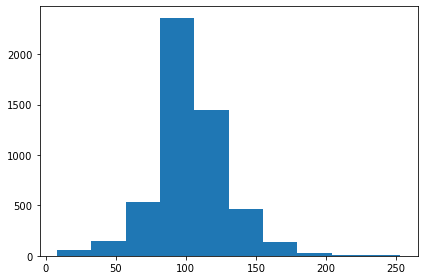

In [75]:
fig, ax = plt.subplots(nrows=1, ncols=1)
plt.hist(df_movie['minute'])
fig.tight_layout()

### 2.1.2 Using boxplots to identify outliers within numeric data

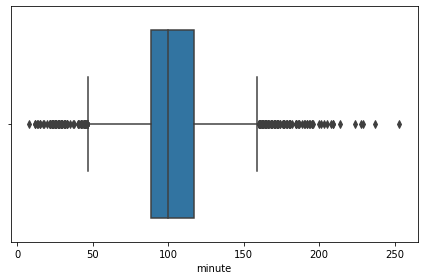

In [76]:
fig, ax = plt.subplots(nrows=1, ncols=1)
ax = sns.boxplot(x=df_movie['minute'])
fig.tight_layout()

In [77]:
df_movie['minute'].describe()

count    5189.000000
mean      102.698786
std        25.954308
min         8.000000
25%        89.000000
50%       100.000000
75%       117.000000
max       253.000000
Name: minute, dtype: float64

### 2.1.3 Using bars to identify outliers within categorical data

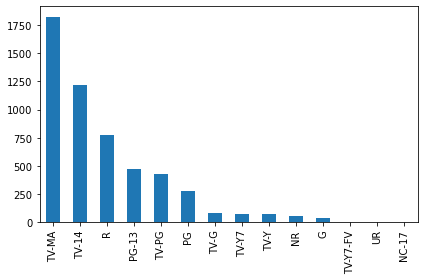

In [78]:
fig=dataseti['rating'].value_counts().plot.bar().get_figure()
fig.tight_layout()

# 2.2 Mënjanimi i zbulimeve jo të sakta (Dealing with Outliers)

### 2.2.1 Using operators & and | to filter out outliers

In [79]:
#filtering outliers out
df_movie = df_movie[(df_movie['minute'] > 43) & (df_movie['minute'] <158)]

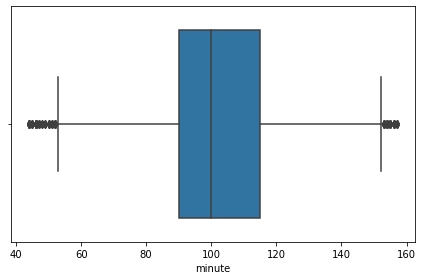

In [80]:
fig, ax = plt.subplots(nrows=1, ncols=1)
ax = sns.boxplot(x=df_movie['minute'])
fig.tight_layout()

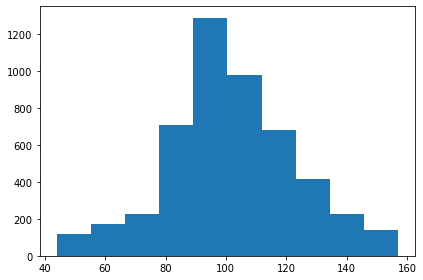

In [81]:
fig, ax = plt.subplots(nrows=1, ncols=1)
plt.hist(df_movie['minute'])
fig.tight_layout()

### 2.2.2 Outliers for release_year

{'whiskers': [<matplotlib.lines.Line2D at 0x1b549f34340>,
 'caps': [<matplotlib.lines.Line2D at 0x1b549f34a60>,
 'boxes': [<matplotlib.lines.Line2D at 0x1b549f25f70>],
 'medians': [<matplotlib.lines.Line2D at 0x1b549f3f1c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1b549f3f550>],
 'means': []}

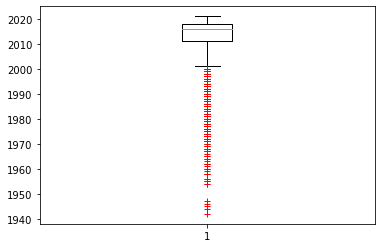

In [82]:
plt.boxplot(dataseti.release_year,sym="r+")

In [83]:
#cleaned_Data
Q1 = dataseti['release_year'].quantile(0.25)
Q3 = dataseti['release_year'].quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range. 

filter = (dataseti['release_year'] >= Q1 - 1.5 * IQR) & (dataseti['release_year'] <= Q3 + 1.5 *IQR)
cleaned_data = dataseti.loc[filter] 


cleaned_data

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...,2021,9
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...,2021,9
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...,2021,9
27,s28,Movie,Grown Ups,Dennis Dugan,"Adam Sandler, Kevin James, Chris Rock, David S...",United States,"September 20, 2021",2010,PG-13,103 min,Comedies,Mourning the loss of their beloved junior high...,2021,9
28,s29,Movie,Dark Skies,Scott Stewart,"Keri Russell, Josh Hamilton, J.K. Simmons, Dak...",United States,"September 19, 2021",2013,PG-13,97 min,"Horror Movies, Sci-Fi & Fantasy",A family’s idyllic suburban life shatters when...,2021,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8801,s8802,Movie,Zinzana,Majid Al Ansari,"Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...","United Arab Emirates, Jordan","March 9, 2016",2015,TV-MA,96 min,"Dramas, International Movies, Thrillers",Recovering alcoholic Talal wakes up inside a s...,2016,3
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",2019,11
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,2019,11
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",2020,1


In [84]:
describe_data= dataseti.release_year.describe()
describe_cleanedData= cleaned_data.release_year.describe()
print("Dataset data: \n",describe_data ,"\n \ncleaned_data:\n", describe_cleanedData)

Dataset data: 
 count    5336.000000
mean     2012.743253
std         9.622570
min      1942.000000
25%      2011.000000
50%      2016.000000
75%      2018.000000
max      2021.000000
Name: release_year, dtype: float64 
 
cleaned_data:
 count    4863.000000
mean     2015.202756
std         4.498093
min      2001.000000
25%      2013.000000
50%      2016.000000
75%      2018.000000
max      2021.000000
Name: release_year, dtype: float64


# 2.3 Eksplorimi i të dhënave: Statistika Përmbledhëse, Multivariante

## 2.3.1 Statistika përmbledhëse

In [85]:
print(f"\nStatistika përmbledhëse sipas atributit 'type':")
dataseti[['type', 'release_year']].groupby("type").count()


Statistika përmbledhëse sipas atributit 'type':


,release_year
type,
Movie,5189
TV Show,147


In [86]:
print(f"\nStatistika përmbledhëse sipas atributit 'rating':")
dataseti[['rating', 'release_year']].groupby("rating").count()


Statistika përmbledhëse sipas atributit 'rating':


,release_year
rating,
G,40
NC-17,2
NR,58
PG,275
PG-13,470
R,778
TV-14,1214
TV-G,84
TV-MA,1823


In [87]:
print(f"\nStatistika përmbledhëse sipas atributit 'release_year':")
dataseti.groupby(['release_year'])['release_year'].count()


Statistika përmbledhëse sipas atributit 'release_year':


release_year
1942      1
1944      1
1945      1
1946      1
1947      1
       ... 
2017    658
2018    648
2019    519
2020    442
2021    161
Name: release_year, Length: 72, dtype: int64

In [88]:
print(f"\nStatistika përmbledhëse sipas atributit 'rating':")
dataseti['rating'].value_counts()


Statistika përmbledhëse sipas atributit 'rating':


TV-MA       1823
TV-14       1214
R            778
PG-13        470
TV-PG        431
PG           275
TV-G          84
TV-Y7         76
TV-Y          76
NR            58
G             40
TV-Y7-FV       3
UR             3
NC-17          2
Name: rating, dtype: int64

In [89]:
print(f'Bressel devijimi standard per vlerat numerike')
dataseti.std()

Bressel devijimi standard per vlerat numerike


release_year    9.622570
month_added     3.495197
dtype: float64

In [90]:
print(f"\nStatistika përmbledhëse sipas atributit 'type':")
type_agg = dataseti.groupby(['type'])
type_agg.describe()


Statistika përmbledhëse sipas atributit 'type':


release_year                                                         \
               count         mean       std     min     25%     50%     75%   
type                                                                          
Movie         5189.0  2012.614569  9.703360  1942.0  2011.0  2016.0  2018.0   
TV Show        147.0  2017.285714  4.047661  1990.0  2016.0  2018.0  2020.0   

                month_added                                                 
            max       count      mean       std  min  25%  50%   75%   max  
type                                                                        
Movie    2021.0      5189.0  6.625939  3.495700  1.0  4.0  7.0  10.0  12.0  
TV Show  2021.0       147.0  6.428571  3.483818  1.0  3.0  6.0   9.0  12.0

In [91]:
print(f"\nStatistika përmbledhëse sipas atributit 'release_year':")
type_agg.agg({'release_year': 'max'})


Statistika përmbledhëse sipas atributit 'release_year':


,release_year
type,
Movie,2021
TV Show,2021


In [92]:
print(f"\nStatistika përmbledhëse sipas atributit 'release_year':")
type_agg.agg({'release_year': 'min'})


Statistika përmbledhëse sipas atributit 'release_year':


,release_year
type,
Movie,1942
TV Show,1990


In [93]:
print(f"\nStatistika përmbledhëse sipas atributit 'rating':")
dataseti[['rating', 'release_year']].groupby("rating").max()


Statistika përmbledhëse sipas atributit 'rating':


,release_year
rating,
G,2019
NC-17,2014
NR,2018
PG,2021
PG-13,2021
R,2021
TV-14,2021
TV-G,2021
TV-MA,2021


In [94]:
print(f"\nStatistika përmbledhëse sipas atributit 'rating':")
dataseti[['rating', 'release_year']].groupby("rating").min()


Statistika përmbledhëse sipas atributit 'rating':


,release_year
rating,
G,1956
NC-17,2013
NR,1958
PG,1973
PG-13,1955
R,1962
TV-14,1942
TV-G,1954
TV-MA,1963


In [95]:
print(f"\nStatistika përmbledhëse sipas atributit 'rating':")
dataseti[['rating', 'release_year']].groupby("rating").mean()


Statistika përmbledhëse sipas atributit 'rating':


,release_year
rating,
G,1997.250000
NC-17,2013.500000
NR,2009.948276
PG,2008.127273
PG-13,2009.178723
R,2010.341902
TV-14,2012.218287
TV-G,2015.297619
TV-MA,2015.908941


## 2.3.2 Statistika multivariante

### 2.3.2.1 Matrix Scatterplot

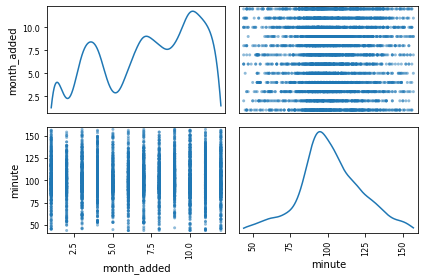

In [96]:
pd.plotting.scatter_matrix(df_movie.loc[:, "month_added":"minute"], diagonal="kde")
plt.tight_layout()
plt.show()

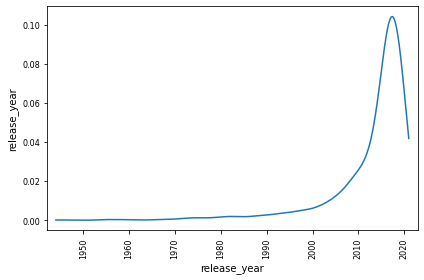

In [97]:
pd.plotting.scatter_matrix(df_movie.loc[:, "release_year":"release_year"], diagonal="kde")
plt.tight_layout()
plt.show()

### 2.3.2.2 Scatterplot with the Data Points Labelled by their Group

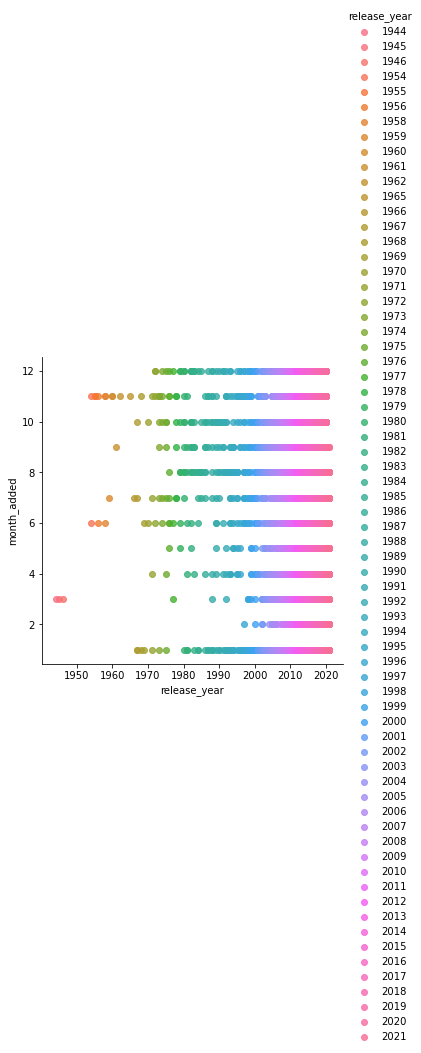

In [98]:
sns.lmplot("release_year", "month_added", df_movie, hue="release_year", fit_reg=False);

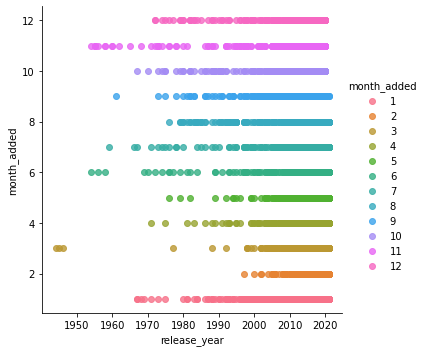

In [99]:
sns.lmplot("release_year", "month_added", df_movie, hue="month_added", fit_reg=False);

### 2.3.2.3 Profile Plot

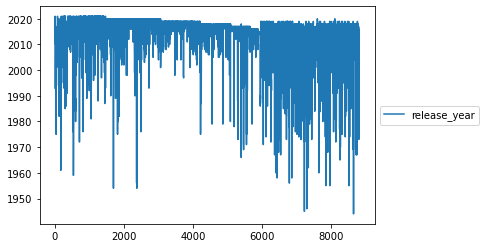

In [100]:
ax = df_movie['release_year'].plot()
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5));

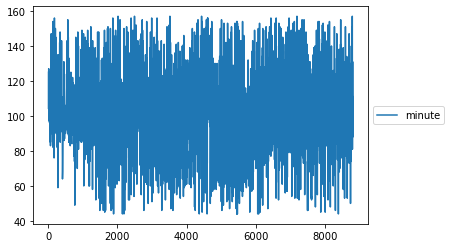

In [101]:
ax = df_movie['minute'].plot()
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5));

# 3. Vizualizimi i të dhënave 


## 3.1 Vizualizimi i të dhënave sipas tipit të të dhënave

Text(0.5, 1.0, "Vizualizimi sipas 'type'")

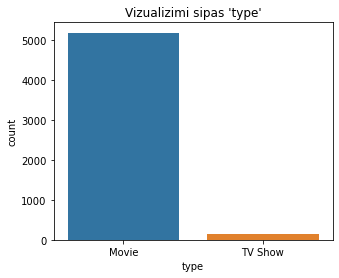

In [171]:
plt.figure(figsize = (5,4))
sns.countplot(x = 'type', data = dataseti)
plt.title("Vizualizimi sipas 'type'")

Text(0.5, 1.0, "Vizualizimi sipas 'rating'")

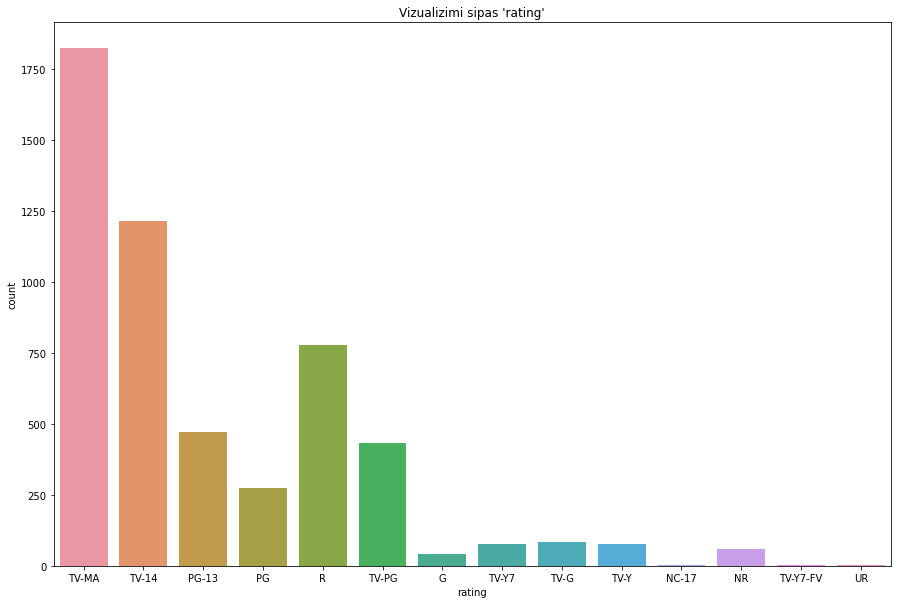

In [172]:
plt.figure(figsize = (15,10))
sns.countplot(x = 'rating', data = dataseti)
plt.title("Vizualizimi sipas 'rating'")

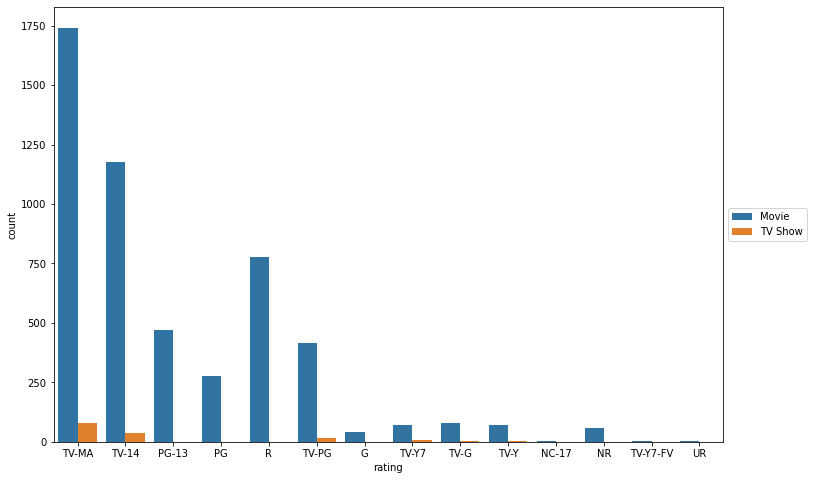

In [173]:
plt.figure(figsize = (12,8))
sns.countplot(x='rating',data = dataseti,hue='type')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5));

In [175]:
top_rated=dataseti[0:10]
fig =px.sunburst(
    top_rated,
    path=['country'],
    title='Përmbajtja sipas shteteve'
)
fig.show()

Text(0.5, 1.0, 'Top 10 zhanret të TV Shows')

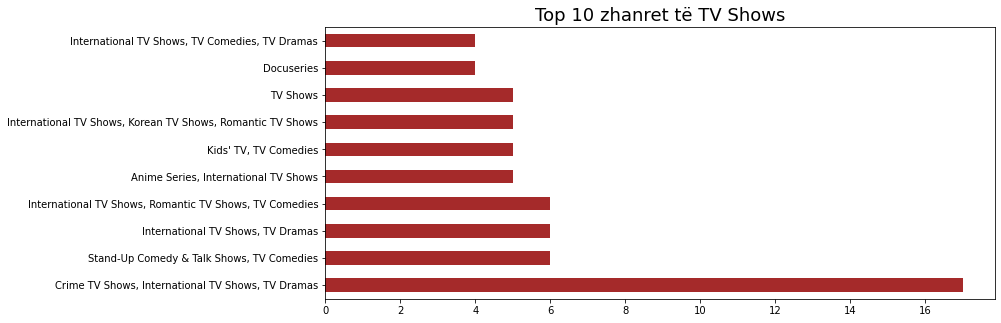

In [176]:
plt.figure(figsize=(12,5))
dataseti[dataseti["type"]=="TV Show"]["listed_in"].value_counts()[:10].plot(kind="barh",color="brown")
plt.title("Top 10 zhanret të TV Shows",size=18)

## 3.2 Vizualizimi statik

In [177]:
data=pd.DataFrame( {"Directors": dataseti.director.value_counts()[0:10].index, "Movie Counts": dataseti.director.value_counts()[0:10].values})
fig = px.bar(data, y='Directors', x='Movie Counts', title="Top 10 Regjisorët" ,color_discrete_sequence=['#b20710'], text='Movie Counts')
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False, categoryorder='total ascending', ticksuffix=' ', showline=False)
fig.update_traces(hovertemplate=None, marker=dict(line=dict(width=0)))
fig.update_layout(margin=dict(t=80, b=0, l=70, r=40),hovermode="y unified",xaxis_title=' ', yaxis_title=" ", height=400,
plot_bgcolor='#333', paper_bgcolor='#333',title_font=dict(size=25, color='#8a8d93', family="Lato, sans-serif"),
font=dict(color='#8a8d93'),legend=dict(orientation="h", yanchor="bottom", y=1, xanchor="center", x=0.5),
hoverlabel=dict(bgcolor="black", font_size=15, font_family="Lato, sans-serif")) 
fig.show()

In [178]:
def find_it(x):
    result=[]
    for i in x:
        for j in i:
            result.append(j)
    return result
Actors_Hollywood=dataseti[dataseti["country"] == 'United States'].cast.dropna().apply(lambda x: x.split(','))
Top_Actors_Hollywood = pd.DataFrame(find_it(Actors_Hollywood.values),columns=["Actors"])
data=pd.DataFrame( {"Actors":[i[0] for i in Top_Actors_Hollywood.value_counts()[0:10].index], "Movie Counts":Top_Actors_Hollywood.value_counts().values[0:10]} )

fig = px.bar(data, y='Actors', x='Movie Counts', title="Top 10 Aktorët në HollyWood" ,color_discrete_sequence=['#b20710'], text='Movie Counts')
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False, categoryorder='total ascending', ticksuffix=' ', showline=False)
fig.update_traces(hovertemplate=None, marker=dict(line=dict(width=0)))
fig.update_layout(margin=dict(t=80, b=0, l=70, r=40),hovermode="y unified",xaxis_title=' ', yaxis_title=" ", height=400,
plot_bgcolor='#333', paper_bgcolor='#333',title_font=dict(size=25, color='#8a8d93', family="Lato, sans-serif"),
font=dict(color='#8a8d93'),legend=dict(orientation="h", yanchor="bottom", y=1, xanchor="center", x=0.5),
hoverlabel=dict(bgcolor="black", font_size=15, font_family="Lato, sans-serif")) 
fig.show()

In [179]:
data = dict(
    number=dataseti.country.value_counts().values[0:10],
    country=dataseti.country.value_counts().index.values[0:10])
fig = px.funnel(data, x='number', y='country',color_discrete_sequence=['#b20710'], title='10 shtetet me më së shumti përmbajtje në Netflix')

fig.update_layout(margin=dict(t=60, b=20, l=70, r=40),
                        xaxis_title=' ', yaxis_title=" ",
                        plot_bgcolor='#333', paper_bgcolor='#333',
                        title_font=dict(size=25, color='#8a8d93', family="Lato, sans-serif"),
                        font=dict(color='#8a8d93'),
                        hoverlabel=dict(bgcolor="black", font_size=13, font_family="Lato, sans-serif"))
fig.show()

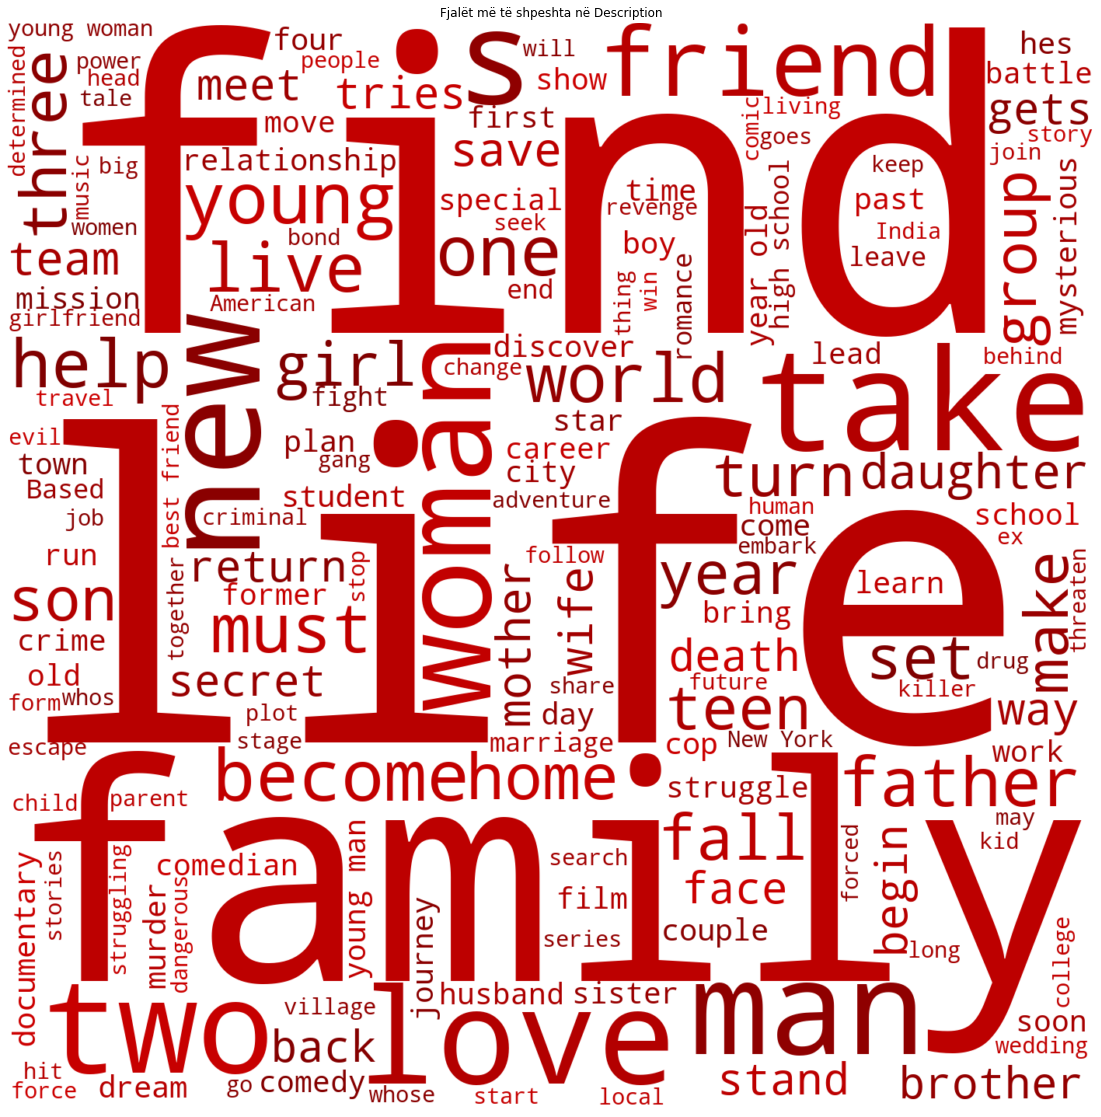

In [186]:
text = str(list(dataseti['description'])).replace(',', '').replace('[', '').replace("'", '').replace(']', '').replace('.', '')

def red_color_func(word, font_size, position, orientation, random_state = None, **kwargs):
    return "hsl(0, 100%%, %f%%)" % random.randint(25, 40)

plt.rcParams['figure.figsize'] = (20, 20)
wordcloud = WordCloud(background_color = 'white', width = 1400,  height = 1400, max_words = 170).generate(text)

wordcloud.recolor(color_func = red_color_func)

plt.title('Fjalët më të shpeshta në Description')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

## 3.3 Vizualizimi interaktiv

In [180]:
data=pd.DataFrame( {"rating": dataseti.rating.value_counts().index, "Counts": dataseti.rating.value_counts().values})

fig = px.pie(data, values='Counts', names='rating',title='Rating sipas %'
        ,hole=0.6 ,  color_discrete_sequence=px.colors.sequential.RdBu )
fig.update_traces(hovertemplate=None, textposition='inside',textinfo="percent+label")

fig.update_layout(margin=dict(t=50, b=50, l=0, r=0),plot_bgcolor='#333', paper_bgcolor='#333',
                  title_font=dict(size=25, color='#8a8d93', family="Lato, sans-serif"),font=dict(size=15, color='#8a8d93'),
                  hoverlabel=dict(bgcolor="#444", font_size=13,font_family="Lato, sans-serif")) 

fig.show()

In [181]:
directors=dataseti.director.value_counts()[0:10].index.values
data=pd.DataFrame({"Director":[],"Rating":[],"Movie":[]})
for i in range(len(directors)):
    rating=dataseti[dataseti["director"]==directors[i]].groupby(['rating'])["rating"].count().index.values
    counts=dataseti[dataseti["director"]==directors[i]].groupby(['rating'])["rating"].count().values
    
    for k in range(len(rating)):
        data = data.append({'Director': directors[i] , "Rating":rating[k],"Movie": counts[k] }, ignore_index=True)

fig = px.bar(data, x="Movie",y="Director", color="Rating", title="Rating më të shpeshta sipas regjisorëve" , color_discrete_sequence=px.colors.sequential.RdBu , text='Rating')
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False, categoryorder='total ascending', ticksuffix=' ', showline=False)
fig.update_traces(hovertemplate=None, marker=dict(line=dict(width=0)))
fig.update_layout(margin=dict(t=80, b=0, l=70, r=40),hovermode="y unified",xaxis_title=' ', yaxis_title=" ", height=400,
plot_bgcolor='#333', paper_bgcolor='#333',title_font=dict(size=25, color='#8a8d93', family="Lato, sans-serif"),
font=dict(color='#8a8d93'),legend=dict(orientation="h", yanchor="bottom", y=1, xanchor="center", x=0.5),
hoverlabel=dict(bgcolor="black", font_size=15, font_family="Lato, sans-serif")) 
fig.show()

In [182]:
data_movie=dataseti[dataseti["type"]=="Movie"]["release_year"].value_counts().sort_index()
data_tv=dataseti[dataseti["type"]=="TV Show"]["release_year"].value_counts().sort_index()

fig = go.Figure()

fig.add_trace(go.Bar(x=data_movie.index.values, y=data_movie.values ,name="Movie",marker_color="#b20710"))
fig.add_trace(go.Bar(x=data_tv.index.values, y=data_tv.values,name="TV Show",marker_color="#221f1f"))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False, categoryorder='total ascending', ticksuffix=' ', showline=False)
fig.update_traces(hovertemplate=None, marker=dict(line=dict(width=0)))
fig.update_layout(margin=dict(t=80, b=0, l=70, r=40),hovermode="y unified",xaxis_title=' ', yaxis_title=" ", height=300,
plot_bgcolor='#333', paper_bgcolor='#333',title_font=dict(size=25, color='#8a8d93', family="Lato, sans-serif"),
font=dict(color='#8a8d93'),legend=dict(orientation="h", yanchor="bottom", y=1, xanchor="center", x=0.5),
hoverlabel=dict(bgcolor="black", font_size=15, font_family="Lato, sans-serif"),title_text='Numri i movies dhe TV Shows sipas vitit') 

fig.show()

### Harta e shpërndarjes sipas shteteve:

In [184]:
df = dataseti['country'].replace("US", "United States").value_counts()
iplot([go.Choropleth(
locationmode='country names',
locations=df.index.values,
text=df.index,
z=df.values
)])

## 3.4 Vizualizimi shumë-dimensional

### Shpërndarja e movies dhe TV Shows sipas muajit në vizualizim shumë-dimenzional:

In [187]:
df = dataseti.assign(n=0).groupby(['month_added', 'release_year'])['n'].count().reset_index()
df = df[df["release_year"] < 2000]
v = df.pivot(index='release_year', columns='month_added', values='n').fillna(0).values.tolist()
iplot([go.Surface(z=v)])